# Data Exploration

## Import necessary libraries

In [1]:
# Import necessary libraries
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For enhanced data visualization
from scipy.stats import zscore # For z-score calculation
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # For standardizing numerical features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # For dimensionality reduction using LDA
from sklearn.svm import SVC # For Support Vector Machine classification
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score # For model evaluation
from imblearn.over_sampling import SMOTE # For handling class imbalance

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
# Read the data
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
# Display basic information about the dataset
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


In [4]:
# Display dataset information
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  f

In [5]:
# Check for missing values
print("\nMissing Values Check:")
print(data.isnull().sum())


Missing Values Check:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


> **The data has no null values**

# Data preprocessing

In [6]:
# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(pd.DataFrame(data['Amount']))

In [7]:
# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

In [8]:
# Check for duplicates
print("\nChecking for Duplicates:")
if data.duplicated().any():
    print("Duplicates Found!")
    # Remove duplicates
    data = data.drop_duplicates()
else:
    print("No Duplicates Found.")


Checking for Duplicates:
Duplicates Found!


In [9]:
# Check for outliers in the 'Amount' column
outliers = (data['Amount'] > 1000).sum()
print("\nOutliers in 'Amount' Column:", outliers)


Outliers in 'Amount' Column: 0


> **There is no null values or outliers. Also we dropped the duplicated data so our data is clean now and ready for PCA**

# Exploratory Data Analysis (EDA)

In [10]:
# Count the number of data in each class: 1 and 0
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [12]:
# Display statistical summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
                  V1             V2             V3             V4  \
count  275663.000000  275663.000000  275663.000000  275663.000000   
mean       -0.037460      -0.002430       0.025520      -0.004359   
std         1.952522       1.667260       1.507538       1.424323   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.941105      -0.614040      -0.843168      -0.862847   
50%        -0.059659       0.070249       0.200736      -0.035098   
75%         1.294471       0.819067       1.048461       0.753943   
max         2.454930      22.057729       9.382558      16.875344   

                  V5             V6             V7             V8  \
count  275663.000000  275663.000000  275663.000000  275663.000000   
mean       -0.010660      -0.014206       0.008586      -0.005698   
std         1.378117       1.313213       1.240348       1.191596   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        

# Dimensionality Reduction using LDA

**We will apply PCA using the following steps:**
> 1. Separate features and target variable
> 2. Split Data into Training and Testing Sets
> 3. Standardize features
> 4. Address Class Imbalance with SMOTE
> 5. Perform LDA for dimensionality reduction

## Step 1: Separate features and target variable

In [13]:
# Separate features and target variable
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

## Step 2: Split Data into Training and Testing Sets
- We split the data into training and testing sets to evaluate the model's performance.
- This helps in assessing how well the model generalizes to unseen data.

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 3: Standardize features
* Standardization is essential for LDA as it ensures that all features have the same scale.
* This prevents features with larger scales from dominating the principal components.

In [15]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Address Class Imbalance with SMOTE
- Class imbalance can negatively impact the performance of the model, especially for rare classes.
- Synthetic Minority Over-sampling Technique (SMOTE) is used to balance the class distribution by generating synthetic samples for the minority class.
- This ensures that the model is trained on a more balanced dataset.

In [17]:
# Apply SMOTE to address class imbalance
print("\nAddressing Class Imbalance with SMOTE:")
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Display information before and after SMOTE
print("Before SMOTE: ", X_train.shape, y_train.shape)
print("After SMOTE: ", X_train_over.shape, y_train_over.shape)
print("After SMOTE Label Distribution: ", pd.Series(y_train_over).value_counts())


Addressing Class Imbalance with SMOTE:
Before SMOTE:  (192964, 29) (192964,)
After SMOTE:  (385254, 29) (385254,)
After SMOTE Label Distribution:  Class
0    192627
1    192627
Name: count, dtype: int64


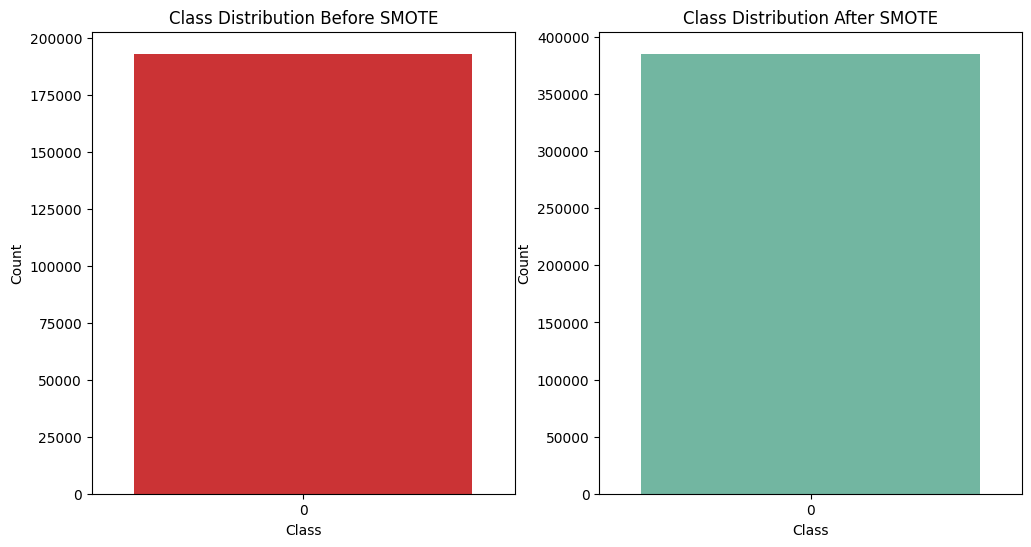

In [18]:
# Visualize Class Distribution Before and After SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train, palette='Set1')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(y_train_over, palette='Set2')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Step 4: Perform LDA for dimensionality reduction

In [19]:
# Perform LDA for dimensionality reduction
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_over, y_train_over)
X_test_lda = lda.transform(X_test)

# SVM Modeling Training

**In this step we will go through these steps:**
> 1. Train SVM Model with Hyperparameter Tuning
> 2. Make Predictions
> 3. Evaluate Model Performance
> 4. Calculate ROC AUC Score

## Step 1: Train SVM Model with Hyperparameter Tuning
* Support Vector Machine (SVM) is a powerful classification algorithm that works well for both linear and non-linear datasets.
* Hyperparameters like kernel type, C (regularization parameter), and gamma influence the model's performance.
* We use grid search or randomized search to find the best combination of hyperparameters.
* For brevity, we'll demonstrate training with default hyperparameters.

In [20]:
# Train SVM Model with Hyperparameter Tuning
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train_over, y_train_over)

SVC(C=1)

## Step 2: Make Predictions

In [21]:
# Make Predictions
y_pred = svm_model.predict(X_test)

## Step 3: Evaluate Model Performance
* Confusion matrix and classification report provide insights into the model's performance across different classes.

In [22]:
# Evaluate Model Performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[81320  1243]
 [   18   118]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     82563
           1       0.09      0.87      0.16       136

    accuracy                           0.98     82699
   macro avg       0.54      0.93      0.57     82699
weighted avg       1.00      0.98      0.99     82699



## Step 4: Calculate ROC AUC Score
* ROC AUC (Receiver Operating Characteristic Area Under the Curve) score measures the model's ability to distinguish between classes.
* A higher ROC AUC score indicates better performance.

In [23]:
# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:", roc_auc)


ROC AUC Score: 0.9262959444160644
